In [3]:
import numpy as np
from numpy.random import randint, rand
from matplotlib import pyplot as plt
from scipy.stats import norm

In [2]:
def Zipf(M, p, n=10**4,alpha=2):
    """Draw a sample of length `n` from the Zipf distribution
    with exponent `alpha` on the set {1,2,...,M} using
    Metropolis-Hastings and the symmetric random-walk proposal.
    """
    def Bernoulli(p): # Draw from Bernoulli(p)
        return rand() <= p # rand() is uniform on [0,1]
    t=0 # Initialize t
    y = np.empty(n) # Initialize y

    y[0]= randint(1,M+1) # Start at a random location

    while t < n-1:
        proposal = min(max(1, y[t] + (-1)**Bernoulli(1-p)), M)
        if proposal > y[t]:
            accept_prob = (y[t]**alpha * (1-p)) / (proposal**alpha * p)

        else:
            accept_prob = (y[t]**alpha * p) / (proposal**alpha * (1-p))
            
        if Bernoulli(accept_prob): # Proposal accepted
            y[t+1] = proposal
        else: # Proposal rejected
            y[t+1] = y[t]

        t += 1
    
    return y

In [45]:
M = 20
alpha = 2
n = 10**5
f = lambda k: k/5
ps = [1,2,3,4]
p_list = f(np.array(ps))

y_list = []

for p in p_list:
    
    y_list.append(Zipf(M, p=p, n=10**5,alpha=2))

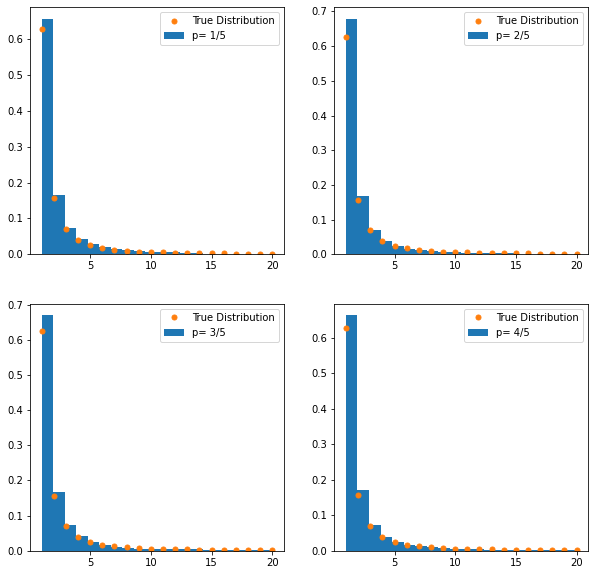

In [60]:
fig = plt.figure(figsize=(10, 10))
labels = ['p= 1/5', 'p= 2/5', 'p= 3/5', 'p= 4/5']
Z = lambda k: 1/(k**alpha)
dom = np.linspace(1, 20, 20)

x_dom = np.linspace(1, 20, 20)
z = np.sum(Z(dom))

dist = lambda x: x**(-alpha) / z

for i,y in enumerate(y_list):
    fig.add_subplot(2,2,i+1)
    plt.hist(y, bins=M , density=True, label=labels[i])
    plt.plot(x_dom, dist(x_dom), 'o', ms=5, label='True Distribution')
    plt.legend()
plt.show()

## Problem 10.7

In [61]:
def Normal(f, var, y_0, n=10**4):
    """Draw a sample of length `n` from the Zipf distribution
    with exponent `alpha` on the set {1,2,...,M} using
    Metropolis-Hastings and the symmetric random-walk proposal.
    """
    def Bernoulli(p): # Draw from Bernoulli(p)
        return rand() <= p # rand() is uniform on [0,1]
    t=0 # Initialize t
    y = np.empty(n) # Initialize y

    y[0]= randint(1,M+1) # Start at a random location

    while t < n-1:
        mu = y[t]
        proposal = np.random.normal(mu, np.sqrt(var), 1)
        accept_prob = f(proposal) / f(y[t])
            
        if Bernoulli(accept_prob): # Proposal accepted
            y[t+1] = proposal
        else: # Proposal rejected
            y[t+1] = y[t]

        t += 1
    
    return y